In [15]:
import numpy as np
from random import shuffle

N, C, d = 25000, 10, 3000
reg = .05 
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)


In [9]:
# naive way to calculate loss and grad
def svm_loss_grad(W, X, y, reg):
    d, C = W.shape 
    _, N = X.shape 
    
    ## naive loss and grad
    loss = 0 
    dW = np.zeros_like(W)
    for n in range(N):
        xn = X[:, n]
        score = W.T.dot(xn)
        for j in range(C):
            if j == y[n]:
                continue 
            margin = 1 - score[y[n]] + score[j]
            if margin > 0:
                loss += margin 
                dW[:, j] += xn 
                dW[:, y[n]] -= xn
    
    loss /= N 
    loss += 0.5*reg*np.sum(W * W) # regularization
    
    dW /= N 
    dW += reg*W # gradient off regularization 
    return loss, dW
    

In [10]:
# Mini-batch gradient descent
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
        batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit 
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]

        loss_history[it], dW = \
            svm_loss_grad(W, X_batch, y_batch, reg)

        W -= lr*dW 
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))

    return W, loss_history 

it 1/1000, loss = 990.710996
it 101/1000, loss = 378.036391
it 201/1000, loss = 117.146907
it 301/1000, loss = 57.336187
it 401/1000, loss = 32.508676
it 501/1000, loss = 33.103935
it 601/1000, loss = 26.592062
it 701/1000, loss = 29.749498
it 801/1000, loss = 34.736810
it 901/1000, loss = 32.061677


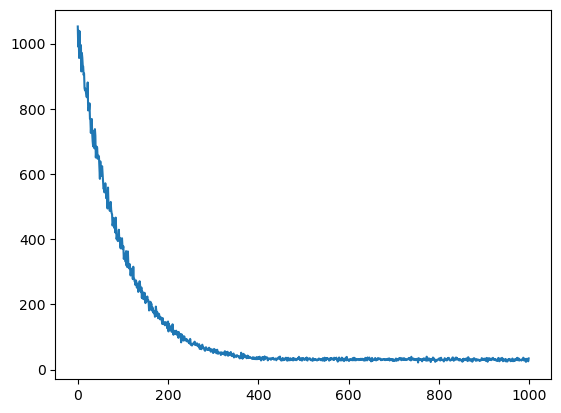

In [11]:
W, loss_history = multiclass_svm_GD(X, y, W, reg)

import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()

In [16]:
# method to compute loss function and its gradient 
# here vectorization was used to speed up
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape 
    _, N = X.shape 
    loss = 0 
    dW = np.zeros_like(W)
    
    Z = W.T.dot(X)     
    
    correct_class_score = np.choose(y, Z).reshape(N,1).T     
    margins = np.maximum(0, Z - correct_class_score + 1) 
    margins[y, np.arange(margins.shape[1])] = 0
# Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N 
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
# Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW


In [17]:
# Mini-batch gradient descent
def multiclass_svm_GD_vectorized(X, y, Winit, reg, lr=.1, \
        batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit 
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]

        loss_history[it], dW = \
            svm_loss_vectorized(W, X_batch, y_batch, reg)

        W -= lr*dW 
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))

    return W, loss_history 


it 1/1000, loss = 1012.147370
it 101/1000, loss = 319.912799
it 201/1000, loss = 141.644618
it 301/1000, loss = 52.301689
it 401/1000, loss = 37.119849
it 501/1000, loss = 27.481671
it 601/1000, loss = 28.603812
it 701/1000, loss = 24.122137
it 801/1000, loss = 32.087290
it 901/1000, loss = 27.101592


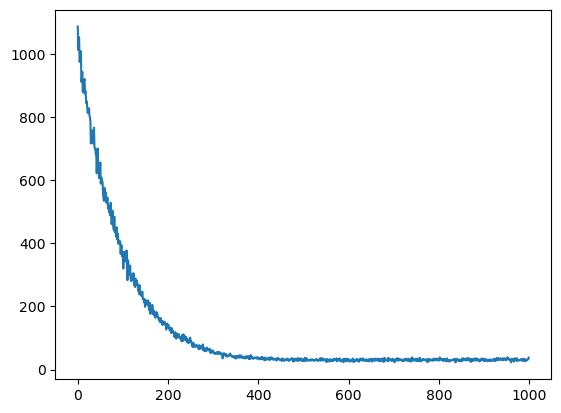

In [18]:
W, loss_history = multiclass_svm_GD_vectorized(X, y, W, reg)

import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()


In [9]:
W
W.shape[0]

3000

In [5]:
# For 2D data
import numpy as np
from random import shuffle

N, C, d = 25000, 10, 2
reg = .05 
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)


In [7]:
# method to compute loss function and its gradient 
# here vectorization was used to speed up
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape 
    _, N = X.shape 
    loss = 0 
    dW = np.zeros_like(W)
    
    Z = W.T.dot(X)     
    
    correct_class_score = np.choose(y, Z).reshape(N,1).T     
    margins = np.maximum(0, Z - correct_class_score + 1) 
    margins[y, np.arange(margins.shape[1])] = 0
# Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N 
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
# Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

In [8]:
# Mini-batch gradient descent
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
        batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit 
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]

        loss_history[it], dW = \
            svm_loss_vectorized(W, X_batch, y_batch, reg)

        W -= lr*dW 
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))

    return W, loss_history 

it 1/1000, loss = 10.564961
it 101/1000, loss = 9.096006
it 201/1000, loss = 9.273228
it 301/1000, loss = 9.341674
it 401/1000, loss = 9.023411
it 501/1000, loss = 8.638597
it 601/1000, loss = 8.877868
it 701/1000, loss = 8.988704
it 801/1000, loss = 8.611196
it 901/1000, loss = 8.917278


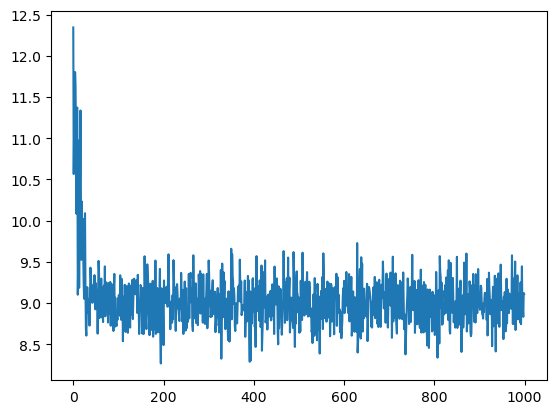

2

In [9]:
W, loss_history = multiclass_svm_GD(X, y, W, reg)

import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()

W
W.shape[0]

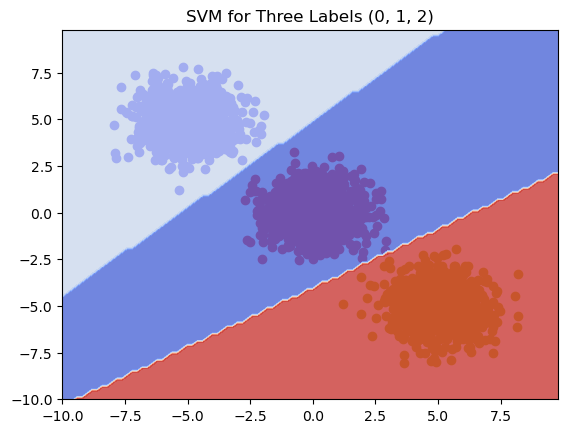

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

N = 1000  # Number of samples

# Create synthetic dataset
X1 = np.random.normal(loc=0, scale=1, size=(N, 2))
Y1 = 0 * np.ones(shape=(1000,))  # LABEL = 0 

X2 = np.random.normal(loc=[-5, 5], scale=1, size=(N, 2))
Y2 = 1 * np.ones(shape=(1000,))  # LABEL = 1

X3 = np.random.normal(loc=[5, -5], scale=1, size=(N, 2))
Y3 = 2 * np.ones(shape=(1000,))  # LABEL = 2

# Create stacked dataset
X = np.vstack((X1, X2, X3))
Y = np.hstack((Y1, Y2, Y3))

# TRAIN SVM LEARNING ALGORITHM
clf = SVC(kernel='linear')
clf = clf.fit(X, Y)

# create decision boundary plot
xx, yy = np.meshgrid(
    np.arange(-10, 10, 0.2),
    np.arange(-10, 10, 0.2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# PLOT EVERYTHING
plt.scatter(X1[:,0], X1[:,1], color='r')
plt.scatter(X2[:,0], X2[:,1], color='b')
plt.scatter(X3[:,0], X3[:,1], color='y')
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("SVM for Three Labels (0, 1, 2)")
plt.show()